In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Importing df from previous data_exploration.ipynb script
df = pd.read_csv('Data/DataExploration_df.csv',index_col=0)

In [3]:
#df=df.drop('id',axis=1)
df=df.drop('day',axis=1)
# Generating sub $3M house price dataset
df = df[(df['price']<3000000)]

In [4]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [5]:
# Generating feature and label numpy arrays 
X = df.drop('price',axis=1).values
y = df['price'].values

In [6]:
# el clasico traintestsplit
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [8]:
# Performing scaling on input features to ensure they dont weight the NN to only be sensitive to large values of the features 
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Initiate scaler 
scaler = MinMaxScaler()

In [10]:
# Fitting scalers to and transforming the training set
X_train = scaler.fit_transform(X_train)
# Transforming the test set by the scalers generated from the training set
X_test = scaler.transform(X_test)

In [11]:
# Generating the fully connected NN model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
model = Sequential()

# trying to base the number of neurons on the number of input features i.e. 19 
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# Output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Training the model USING VALIDATION DATA 

""" Using validation data: 
    After each epoch on your training data it runs the model on your test data and keeps track of the loss on the test data too.       BUT the model run on the test data is just a feed forward pass, the result on the test data doesnt affect the weights or           biases. Helps to see if overfitting is occuring -> training loss would decrease whereas validation loss would stay the same/       increase.
    
    Using batch_size:
    Because we have quite a large dataset we only train on batches per epoch to save on computational efficiency. 
    e.g. here we have a batch size of 128 samples. This means a batch of 128 samples will be used to update the model parameters
    and then the next batch of 128 parameters will be used until all the samples have been used in the training dataset. This is
    1 epoch. So here since 1<batch_size<total samples we are doing mini-batch gradient descent. """


In [39]:
model.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size=128, epochs=400)

7ms/step - loss: 25589153792.0000 - val_loss: 27604168704.0000
Epoch 239/400
118/118 [==============================] - 1s 8ms/step - loss: 25564473344.0000 - val_loss: 27558389760.0000
Epoch 240/400
118/118 [==============================] - 1s 7ms/step - loss: 25549459456.0000 - val_loss: 27558713344.0000
Epoch 241/400
118/118 [==============================] - 1s 7ms/step - loss: 25594456064.0000 - val_loss: 27592509440.0000
Epoch 242/400
118/118 [==============================] - 1s 7ms/step - loss: 25518424064.0000 - val_loss: 27604774912.0000
Epoch 243/400
118/118 [==============================] - 1s 8ms/step - loss: 25542238208.0000 - val_loss: 27545657344.0000
Epoch 244/400
118/118 [==============================] - 1s 8ms/step - loss: 25499330560.0000 - val_loss: 27559682048.0000
Epoch 245/400
118/118 [==============================] - 1s 7ms/step - loss: 25506119680.0000 - val_loss: 27599951872.0000
Epoch 246/400
118/118 [==============================] - 1s 7ms/step - loss:

In [40]:
# Extracting loss history from training
losses = pd.DataFrame(model.history.history)

In [41]:
losses # Note that we get the loss and the val loss values out, i.e. loss on training data and loss on test data. 

,loss,val_loss
0,3.885415e+11,3.964241e+11
1,3.869456e+11,3.904596e+11
2,3.614314e+11,3.310903e+11
3,2.465768e+11,1.643615e+11
4,1.037925e+11,8.567964e+10
...,...,...
395,2.384133e+10,2.678503e+10
396,2.383684e+10,2.677039e+10
397,2.383079e+10,2.674723e+10
398,2.383833e+10,2.674929e+10


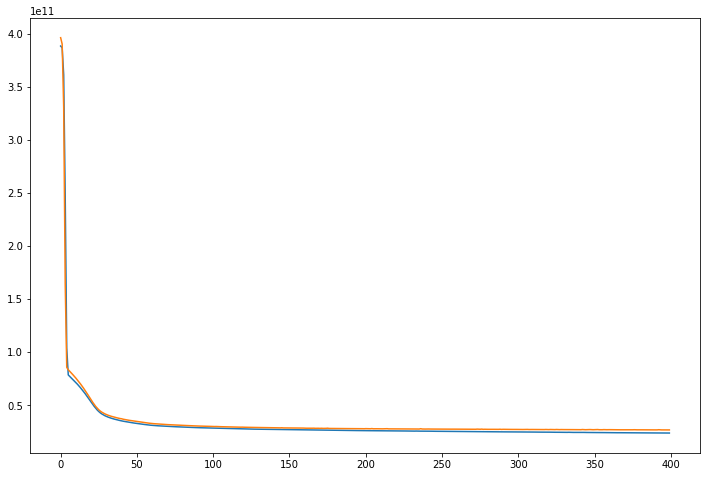

In [42]:
plt.figure(figsize=(12,8))
plt.plot(losses)

# training and validation loss both decrease together therefore no overfitting

In [43]:
# --------- Model evaluation -----------
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [44]:
predictions = model.predict(X_test)

In [45]:
predictions

array([[751913.5 ],
       [300880.84],
       [813725.94],
       ...,
       [455920.88],
       [478678.75],
       [305152.4 ]], dtype=float32)

In [46]:
mean_absolute_error(y_test,predictions)

102643.26487480254

In [47]:
mean_squared_error(y_test,predictions)

26738523743.07941

# Explained variance score: tells you how much of the datas vairance is being explained by your model. perfect score = 1 

In [48]:
explained_variance_score(y_test,predictions)

0.7617542671758651

# Plotting out the true prices vs the predictions 


Text(0, 0.5, 'Predicted Price')

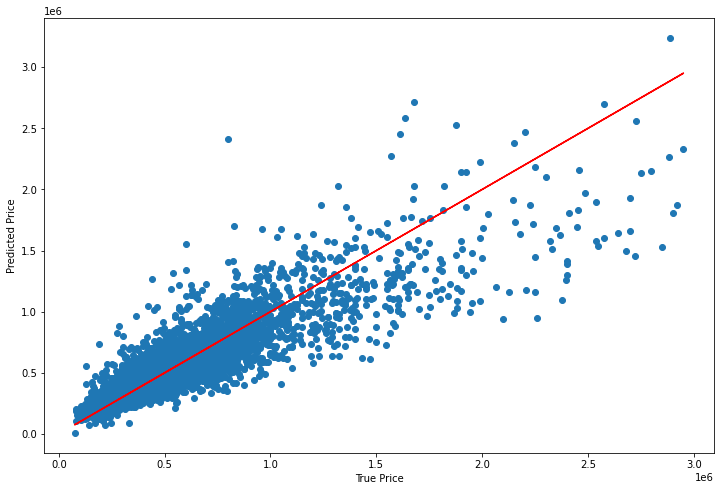

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

In [50]:
# Slightly lower MAE but the overall fit is actually worse???? unexpected. 

2998000.0